<a href="https://colab.research.google.com/github/Pranjita1/classification/blob/master/MLDM_StockPrediction_Pranjita_Chakraborty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aims to explore the news data and understand how it impacts stock price. This dataset is taken from Kaggle - https://www.kaggle.com/aaron7sun/stocknews

The downloaded zip file will contain 3 csv files:

1. news top headlines over a period of time
2. DowJones stock prices over a period of time
3. Combined csv, where date and headlines include a label column where lables indicate if the price has moved up or down. Of these we use only the combined news file for this project. The labels are binary - 0 meaning overall downward movement and 1 indicating an overall upward movement.
The significance of the work is that:

Under efficient market hypothesis concerning investment strategy studies, we have three forms.

1. Weak Form of market hypothesis - states that the movement of stock prices are random in nature and technical analysis of past price movements provides no insight into future prices.

2. Semi-strong form efficiency contends that security prices have factored in publicly-available market and that price changes to new equilibrium levels are reflections of that information.

3. The strong form version of the efficient market hypothesis states that all information—both the information available to the public and any information not publicly known—is completely accounted for in current stock prices, and there is no type of information that can give an investor an advantage on the market.

Here through this study, we study the semi-strong form of efficiency market hypothesis and attempt to show that indeed stock prices adjust to publicly available information - which in our case is news of this dataset.

In [ ]:
import pandas as pd

df = pd.read_csv('Combined_News_DJIA.csv')

df.head(3)

Date  ...                                              Top25
0  2008-08-08  ...           b"No Help for Mexico's Kidnapping Surge"
1  2008-08-11  ...  b"So this is what it's come to: trading sex fo...
2  2008-08-12  ...  b"BBC NEWS | Asia-Pacific | Extinction 'by man...

[3 rows x 27 columns]

This dataset contains data from 2008 to 2016, which is a long period to study any impact.

Also, we consider overall movement - which can be a good indicator for intraday trading activities where one puts or calls based upon estimates of rise or fall of price one makes. After using this model of and getting an idea of whether the price will increase or decrease, using the stock prices one can further get an idea of expected numerical value of the increase or decrese.

As a first step, let's inspect individual years. 2008 was the year of the great recession and some major events across the world. Let's see it's influence on the overall sentiment.

In [ ]:
Year08 = df[df['Date']<='20081231']
Year08.tail(2)

Date  ...                                              Top25
99   2008-12-30  ...  b"Polygamy in the UK : Woman didn't know new h...
100  2008-12-31  ...  b'The Arab Conscience: A 40 minute song perfor...

[2 rows x 27 columns]

Feature engineering on Year'08

In [ ]:
#considering only the headlines
x = Year08.iloc[:,2:27]

#except for alphabets removing all punctuations
x.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

#converting column hearders to numbers for easy accessiblity
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
x.columns= new_Index

#converting all to lower case
for index in new_Index:
    x[index]=x[index].str.lower()


x.head(2)

0  ...                                                 24
0  b georgia  downs two russian warplanes  as cou...  ...           b no help for mexico s kidnapping surge 
1  b why wont america and nato help us  if they w...  ...  b so this is what it s come to  trading sex fo...

[2 rows x 25 columns]

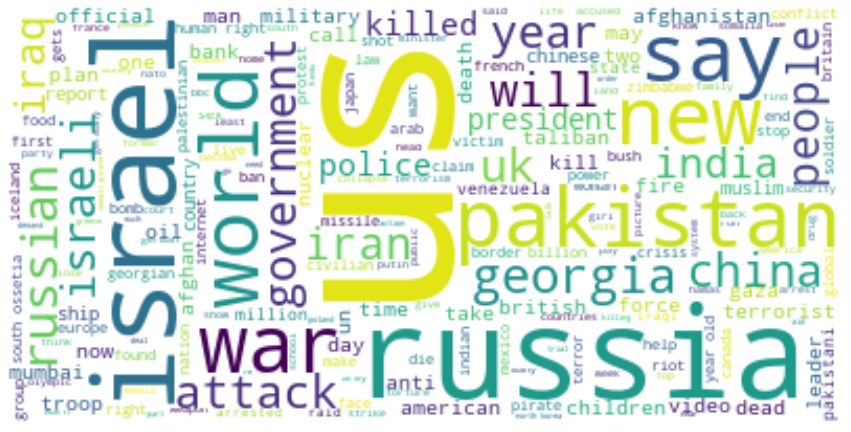

In [ ]:
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

headlines = []
for row in range(0,len(x.index)):
    headlines.append(' '.join(str(a) for a in x.iloc[row,0:25]))

from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

# Create and generate a word cloud image:
head_string=(" ").join(headlines)

wordcloud = WordCloud(background_color="white").generate(head_string)
# Display the generated image:
plt.figure(figsize=(15,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
wordcloud.to_file('2008.png')

In [ ]:
print(Year08['Label'].isin([0]).sum())
print(Year08['Label'].isin([1]).sum())

54
47


Similarly, we see for the Years - 2009 to 2016.

In [ ]:
type(df['Date'])

pandas.core.series.Series

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
start_date = '2009-01-01'
end_date = '2009-12-31'

mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)

Year09 = df.loc[mask]
Year09.tail(2)

Date  ...                                              Top25
351 2009-12-30  ...  b'The heirs to Argentinas most powerful media ...
352 2009-12-31  ...               b"Mousavi 'ready to die' for reform"

[2 rows x 27 columns]

Feature engineering for Year 2009. 

In [ ]:
def ArtByYear(df):
  #considering only the headlines
  x = df.iloc[:,2:27]

  #except for alphabets removing all punctuations
  x.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

  #converting column hearders to numbers for easy accessiblity
  list1= [i for i in range(25)]
  new_Index=[str(i) for i in list1]
  x.columns= new_Index

  #converting all to lower case
  for index in new_Index:
     x[index]=x[index].str.lower()
  
  headlines = []
  for row in range(0,len(x.index)):
    headlines.append(' '.join(str(a) for a in x.iloc[row,0:25]))
  
  head_string=(" ").join(headlines)
  wordcloud = WordCloud(background_color="white").generate(head_string)

  # Display the generated image:
  plt.figure(figsize=(15,12))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")

  lows = df['Label'].isin([0]).sum()
  highs = df['Label'].isin([1]).sum()
  
  #wordcloud.to_file('{}.png'.format(df))
  return plt.show(), lows, highs
  

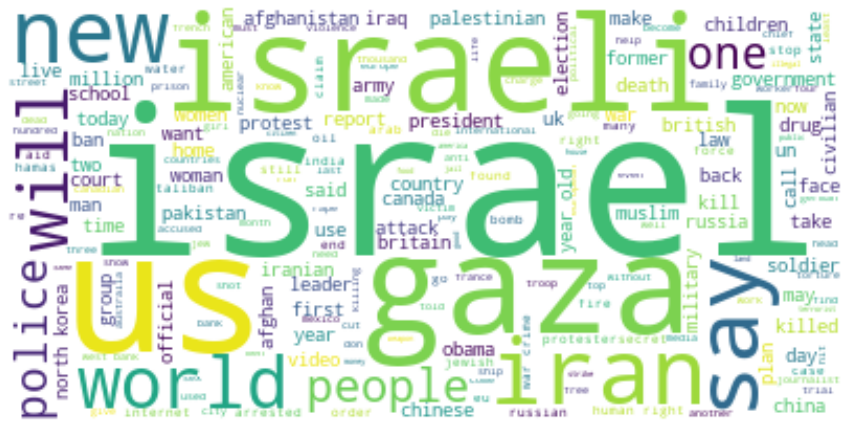

(None, 116, 136)

In [ ]:
ArtByYear(Year09)

In [ ]:
start_date = '2010-01-01'
end_date = '2010-12-31'

mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)

Year10 = df.loc[mask]
Year10.tail(2)

Date  ...                                              Top25
603 2010-12-30  ...  Dubai's finances: Debt forgetfulness - The bai...
604 2010-12-31  ...  The Lucrative Business of Polluting - The Kyot...

[2 rows x 27 columns]

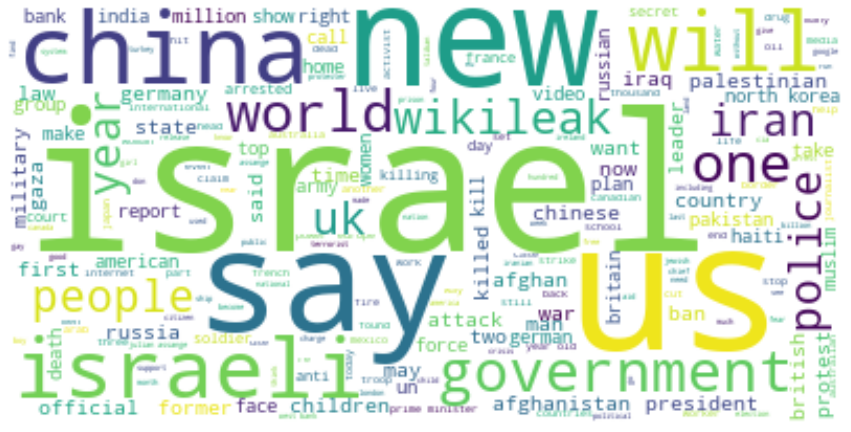

(None, 109, 143)

In [ ]:
ArtByYear(Year10)

In [ ]:
start_date = '2011-01-01'
end_date = '2011-12-31'

mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)

Year11 = df.loc[mask]
Year11.tail(2)

Date  ...                                              Top25
855 2011-12-29  ...  Syrians Fire On Protesters Despite Presence Of...
856 2011-12-30  ...  North Korea Restores Order to Kim Funeral With...

[2 rows x 27 columns]

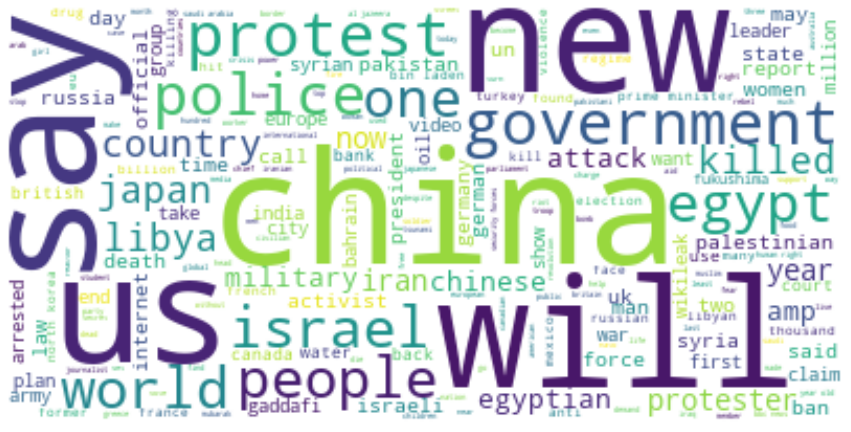

(None, 113, 139)

In [ ]:
ArtByYear(Year11)

In [ ]:
start_date = '2012-01-01'
end_date = '2012-12-31'

mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)

Year12 = df.loc[mask]
Year12.tail(2)

Date  ...                                              Top25
1105 2012-12-28  ...             The police slap heard all over Bahrain
1106 2012-12-31  ...  Sex, drugs and rock and roll: Australia's othe...

[2 rows x 27 columns]

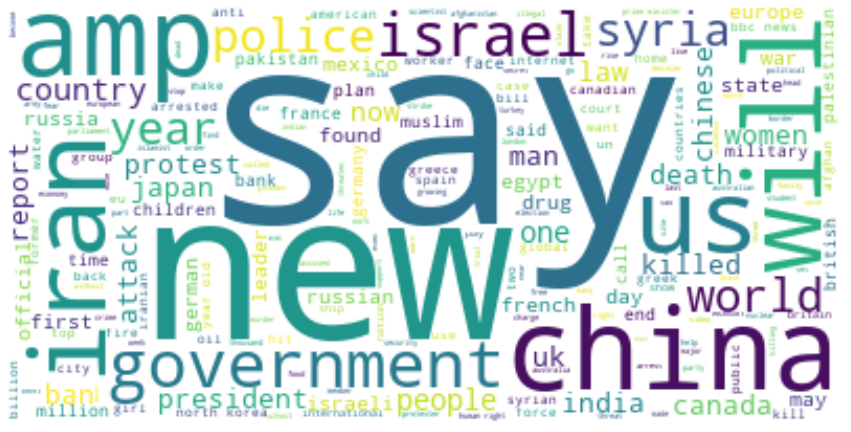

(None, 127, 123)

In [ ]:
ArtByYear(Year12)

In [ ]:
start_date = '2013-01-01'
end_date = '2013-12-31'

mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)

Year13 = df.loc[mask]
Year13.tail(2)

Date  ...                                              Top25
1357 2013-12-30  ...  98-year-old photo negatives discovered in Anta...
1358 2013-12-31  ...  Thai street vendors using hospital x-ray films...

[2 rows x 27 columns]

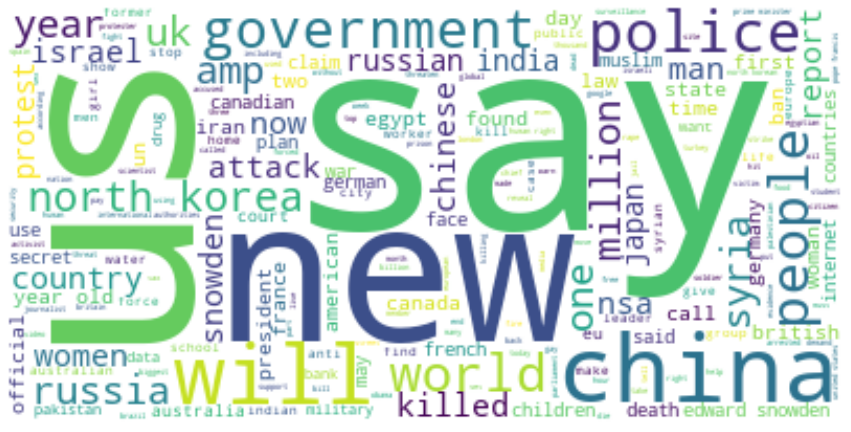

(None, 106, 146)

In [ ]:
ArtByYear(Year13)

In [ ]:
start_date = '2014-01-01'
end_date = '2014-12-31'

mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)

Year14 = df.loc[mask]
Year14.tail(2)

Date  ...                                              Top25
1609 2014-12-30  ...  One of China's most industrialized cities has ...
1610 2014-12-31  ...        At Least 33 Killed in Yemen Suicide Bombing

[2 rows x 27 columns]

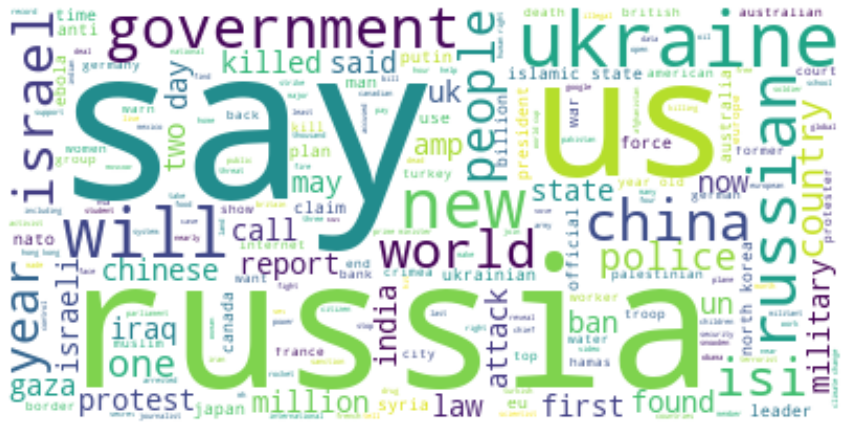

(None, 113, 139)

In [ ]:
ArtByYear(Year14)

In [ ]:
start_date = '2015-01-01'
end_date = '2015-12-31'

mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)

Year15 = df.loc[mask]
Year15.tail(2)

Date  ...                                              Top25
1861 2015-12-30  ...  UK Sperm Bank Doesn't Accept Donors with Dysle...
1862 2015-12-31  ...  Hamas to keep Palestinians from ringing in New...

[2 rows x 27 columns]

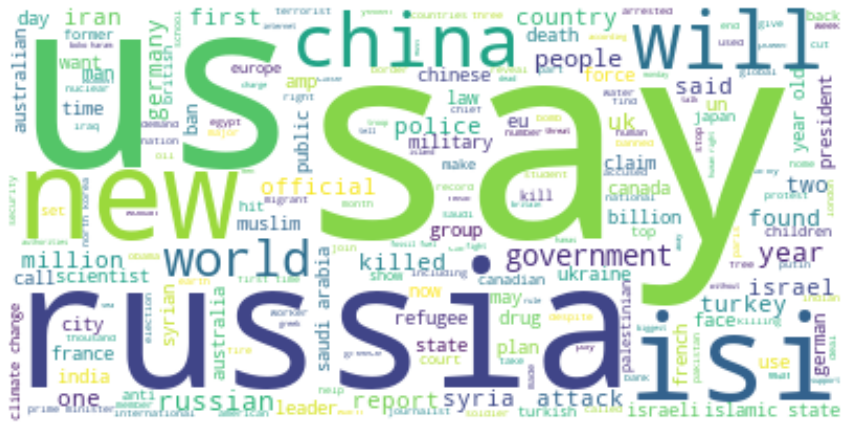

(None, 130, 122)

In [ ]:
ArtByYear(Year15)

In [ ]:
start_date = '2016-01-01'
end_date = '2016-07-01'

mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)

Year16 = df.loc[mask]
Year16.tail(2)

Date  ...                                              Top25
1987 2016-06-30  ...  Law Enforcement Sources: Gun Used in Paris Ter...
1988 2016-07-01  ...  Ozone layer hole seems to be healing - US &amp...

[2 rows x 27 columns]

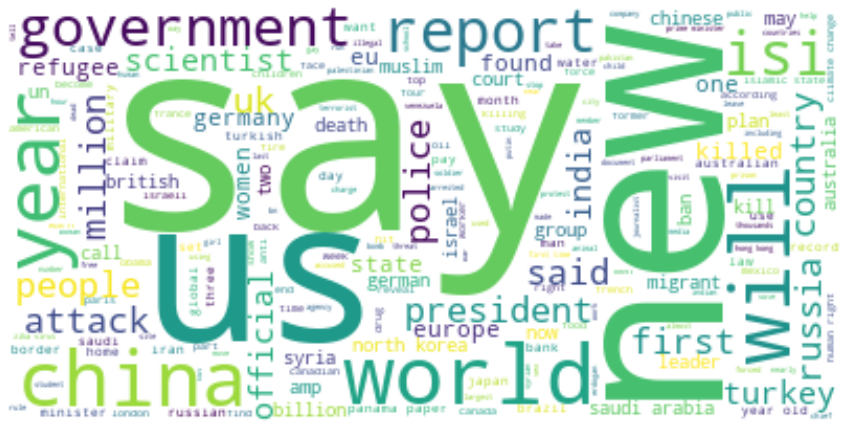

(None, 56, 70)

In [ ]:
ArtByYear(Year16)

Plotting the zeros and ones.

In [ ]:
yearwise = {'Year': ['2008','2009','2010','2011','2012','2013','2014','2015','2016'],
    'Lows':[54,116,109,113,127,106,113,130,56],
    'High or Same': [47,136,143,139,123,143,139,122,70]
}
yearwise = pd.DataFrame (yearwise, columns = ['Year','Lows','High or Same'])
yearwise.head(2)

Year  Lows  High or Same
0  2008    54            47
1  2009   116           136

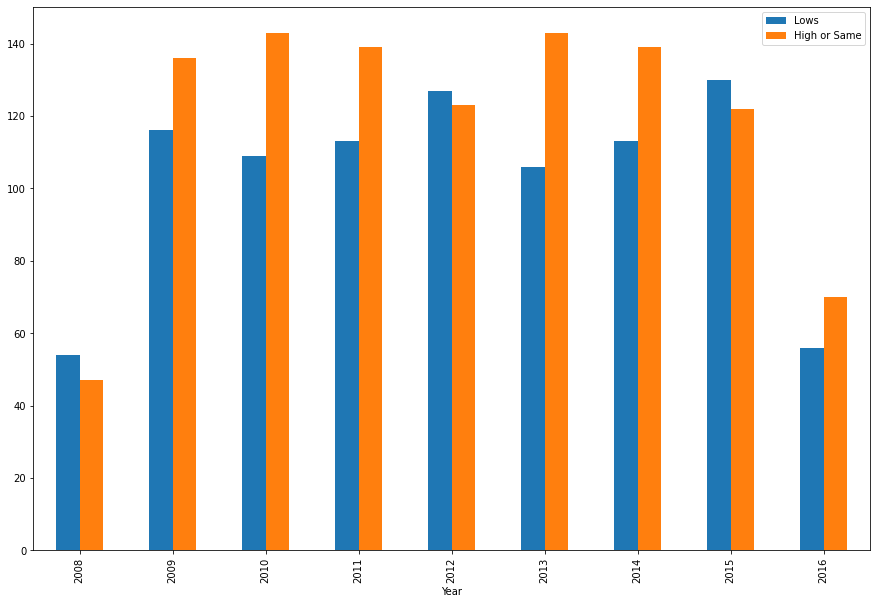

In [ ]:
yearwise.plot(x = 'Year', kind='bar', figsize = (15,10))


In [ ]:
df = pd.read_csv('Combined_News_DJIA.csv')
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [ ]:
#considering only the headlines
x = train.iloc[:,2:27]

#except for alphabets removing all punctuations
x.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

#converting column hearders to numbers for easy accessiblity
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
x.columns= new_Index

#converting all to lower case
for index in new_Index:
     x[index]=x[index].str.lower()

x.head(2)
  

0  ...                                                 24
0  b georgia  downs two russian warplanes  as cou...  ...           b no help for mexico s kidnapping surge 
1  b why wont america and nato help us  if they w...  ...  b so this is what it s come to  trading sex fo...

[2 rows x 25 columns]

In [ ]:
print(train['Label'].isin([0]).sum())
print(train['Label'].isin([1]).sum())

738
873


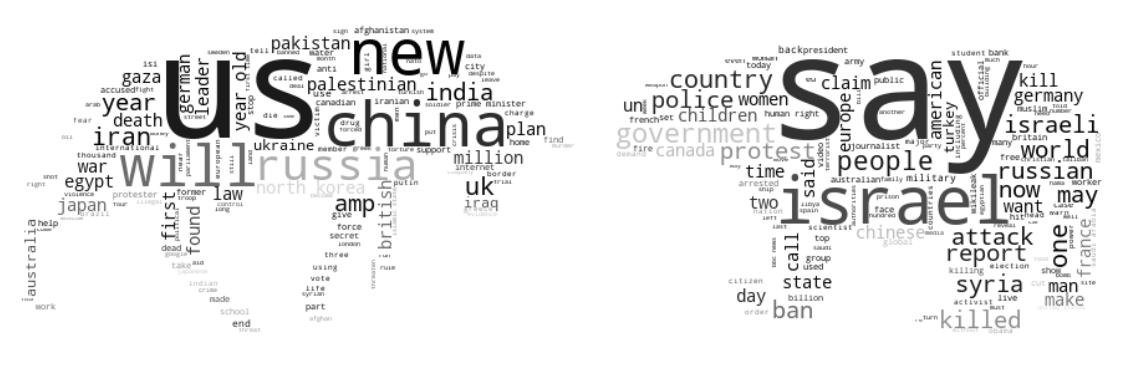

In [ ]:
  import numpy as np
  from PIL import Image
  from wordcloud import ImageColorGenerator
 
  headlines = []
  for row in range(0,len(x.index)):
    headlines.append(' '.join(str(a) for a in x.iloc[row,0:25]))
  
  head_string=(" ").join(headlines)
  
  # Generate a word cloud image
  mask = np.array(Image.open("image.png"))
  wordcloud_fra = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(head_string)

  # create coloring from image
  image_colors = ImageColorGenerator(mask)
  plt.figure(figsize=[20,20])
  plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
  plt.axis("off")

  # store to file
  plt.savefig("stock_new.png", format="png")

  plt.show()

In [ ]:
#now, I will be using CountVectorizer. 
#It is because it helps to both tokenize a collection of text documents and build a vocabulary of known words, 
#but also to encode new documents using that vocabulary.
# Instead of using Logistic regression classifier, I make use of RandomForestClassier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

!st, since we do not know exactly which 'n'-gram would be best for our model, we experiment using varying ngram_ranges.

We compare each model by its etrics and choose the best combination

For this, we choose the following ranges:

(1,1) (1,2) (1,3) (1,4) (2,2) (2,3) (2,4)

In [ ]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(1,1))
traindataset=countvector.fit_transform(headlines)

# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
  ## Predict for the Test Dataset
  test_transform= []
  for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
  test_dataset = countvector.transform(test_transform)
  predictions = randomclassifier.predict(test_dataset)



  matrix=confusion_matrix(test['Label'],predictions)
  print(matrix)
  score=accuracy_score(test['Label'],predictions)
  print(score)
  report1=classification_report(test['Label'],predictions)
  print(report1)



[[142  44]
 [ 16 176]]
0.8412698412698413
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       186
           1       0.80      0.92      0.85       192

    accuracy                           0.84       378
   macro avg       0.85      0.84      0.84       378
weighted avg       0.85      0.84      0.84       378



In [ ]:
 ## Import library to check accuracy
 from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

 ## implement BAG OF WORDS
 countvector=CountVectorizer(ngram_range=(1,2))
 traindataset=countvector.fit_transform(headlines)

 # implement RandomForest Classifier
 randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
 randomclassifier.fit(traindataset,train['Label'])

 ## Predict for the Test Dataset
 test_transform= []
 for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
 test_dataset = countvector.transform(test_transform)
 predictions = randomclassifier.predict(test_dataset)



 matrix=confusion_matrix(test['Label'],predictions)
 print(matrix)
 score=accuracy_score(test['Label'],predictions)
 print(score)
 report2=classification_report(test['Label'],predictions)
 print(report2)

[[132  54]
 [ 11 181]]
0.828042328042328
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       186
           1       0.77      0.94      0.85       192

    accuracy                           0.83       378
   macro avg       0.85      0.83      0.83       378
weighted avg       0.85      0.83      0.83       378



In [ ]:
countvector=CountVectorizer(ngram_range=(1,4))
traindataset=countvector.fit_transform(headlines)

randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)



matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report3=classification_report(test['Label'],predictions)
print(report3)

[[132  54]
 [  2 190]]
0.8518518518518519
              precision    recall  f1-score   support

           0       0.99      0.71      0.83       186
           1       0.78      0.99      0.87       192

    accuracy                           0.85       378
   macro avg       0.88      0.85      0.85       378
weighted avg       0.88      0.85      0.85       378



In [ ]:
countvector=CountVectorizer(ngram_range=(1,3))
traindataset=countvector.fit_transform(headlines)

randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)



matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report3=classification_report(test['Label'],predictions)
print(report3)

[[135  51]
 [  3 189]]
0.8571428571428571
              precision    recall  f1-score   support

           0       0.98      0.73      0.83       186
           1       0.79      0.98      0.87       192

    accuracy                           0.86       378
   macro avg       0.88      0.86      0.85       378
weighted avg       0.88      0.86      0.85       378



In [ ]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)



matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report4=classification_report(test['Label'],predictions)
print(report4)

[[133  53]
 [  1 191]]
0.8571428571428571
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       186
           1       0.78      0.99      0.88       192

    accuracy                           0.86       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.86      0.85       378



In [ ]:
countvector=CountVectorizer(ngram_range=(2,3))
traindataset=countvector.fit_transform(headlines)

randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)



matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report5=classification_report(test['Label'],predictions)
print(report5)

[[131  55]
 [  1 191]]
0.8518518518518519
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       186
           1       0.78      0.99      0.87       192

    accuracy                           0.85       378
   macro avg       0.88      0.85      0.85       378
weighted avg       0.88      0.85      0.85       378



In [ ]:
countvector=CountVectorizer(ngram_range=(2,4))
traindataset=countvector.fit_transform(headlines)

randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)



matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report6=classification_report(test['Label'],predictions)
print(report6)

[[131  55]
 [  1 191]]
0.8518518518518519
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       186
           1       0.78      0.99      0.87       192

    accuracy                           0.85       378
   macro avg       0.88      0.85      0.85       378
weighted avg       0.88      0.85      0.85       378



In [ ]:
from urllib.request import urlopen 
from bs4 import BeautifulSoup

In [ ]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
html = urlopen('https://timesofindia.indiatimes.com/timestopten/msid-76324921.cms') 
bs = BeautifulSoup(html.read(), 'html.parser') 

headlines = bs.find_all('a', {'class': 'news_title'})

headline = []
for head in headlines:
   headline.append(head.get_text())

headline_transform = countvector.transform(headline)
predictions = randomclassifier.predict(headline_transform)

counts = np.bincount(predictions)
print(np.argmax(counts))



1


Indeed the price from 11th June to 12th June had increased. So, we see, that the model does predict the trend, if we feed it with news headlines.